In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.metrics import f1_score as f1
from time import time
import scikitplot as skplt
import graphviz 
import sweetviz as sv


%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df_master = pd.read_csv('C:\\Users\\colli\\OneDrive\\PGP-AI-ML\\BankChurners.csv') 

In [3]:
print(df_master.head(20))



    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer      

In [4]:
print(df_master.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')


In [5]:
print(df_master.describe)

<bound method NDFrame.describe of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Inco

In [6]:
print(df_master.info())
print(df_master.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
print(df_master.isna().any())

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
Unnamed: 21                  True
dtype: bool


Data set contains no null values, not sure where the 'Unnamed:' column came from, but we will drop that

In [8]:
print(df_master.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 21                 float64
dtype: object


In [9]:
df_master.value_counts

<bound method DataFrame.value_counts of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Statu

In [10]:
print(df_master[::].nunique())



CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



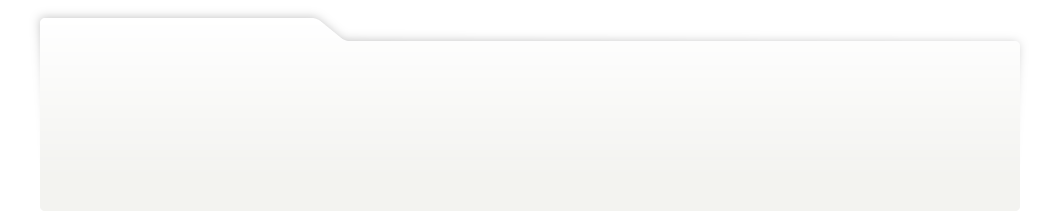
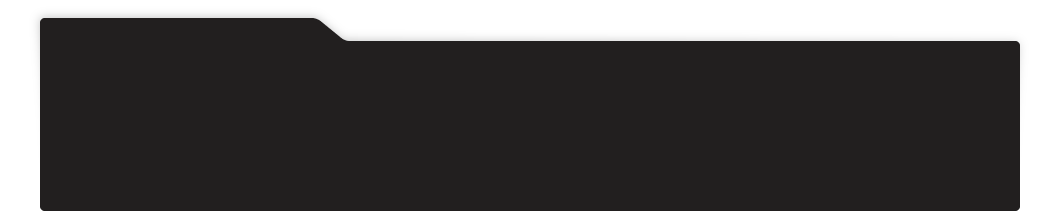
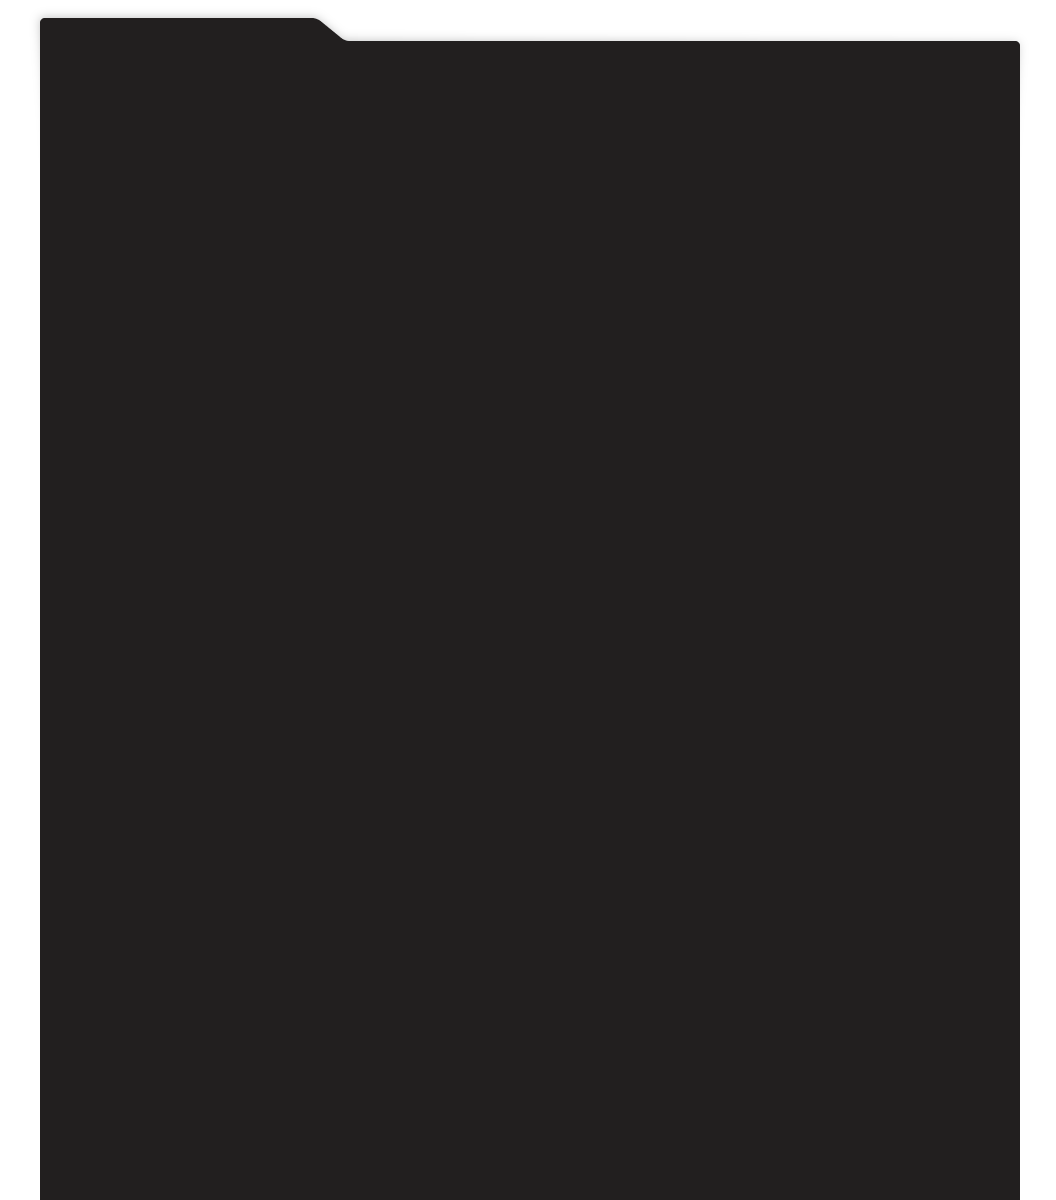
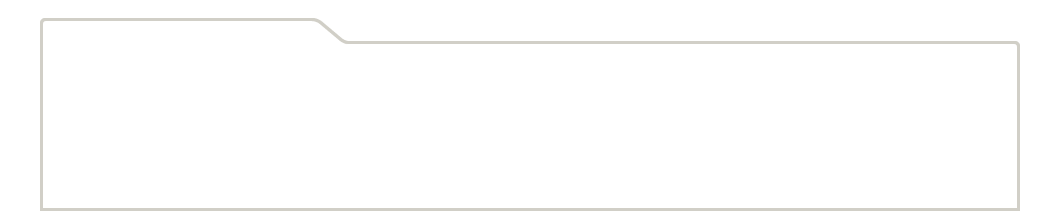
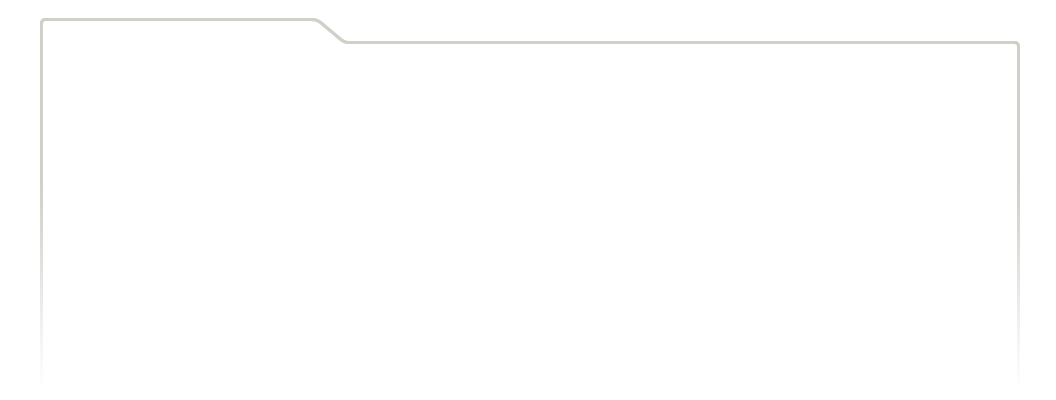
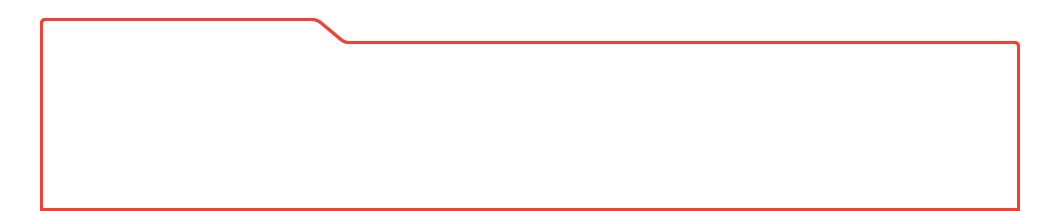
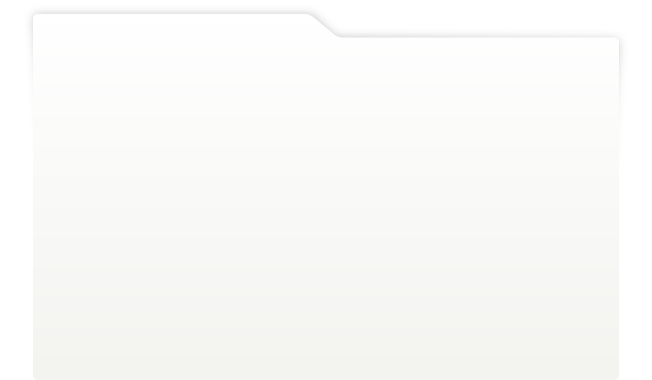
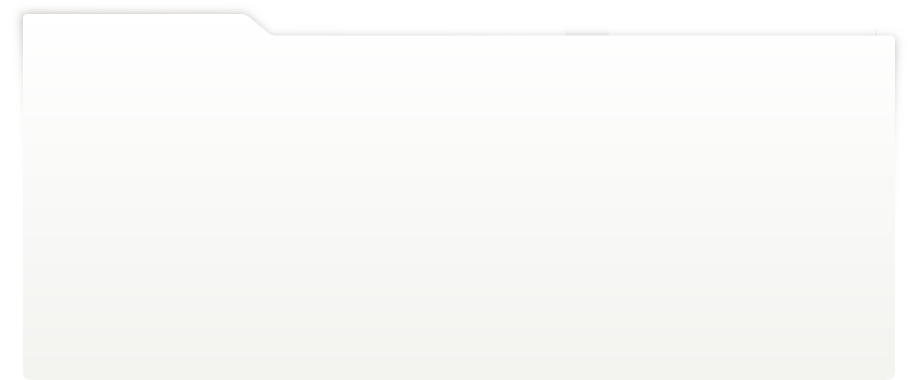
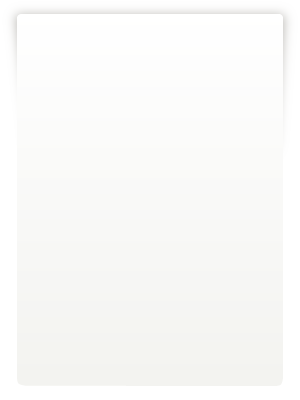
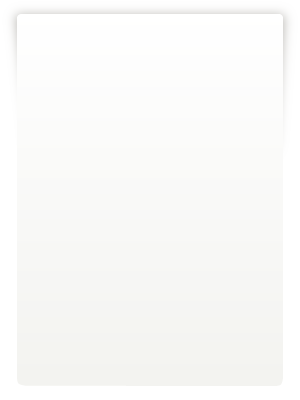
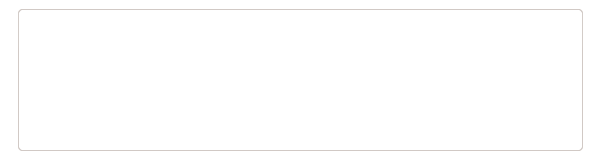
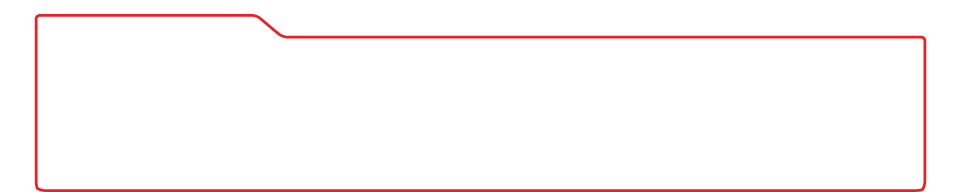
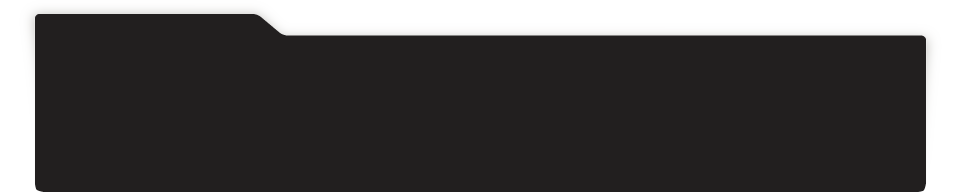
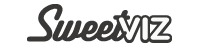
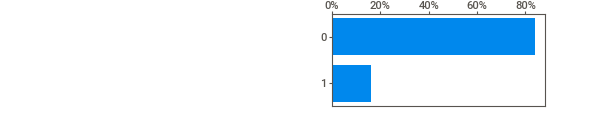
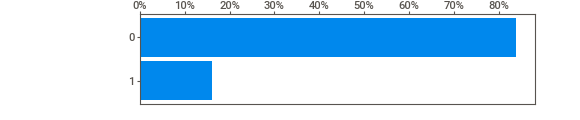
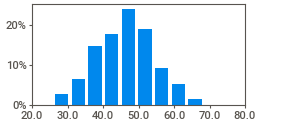
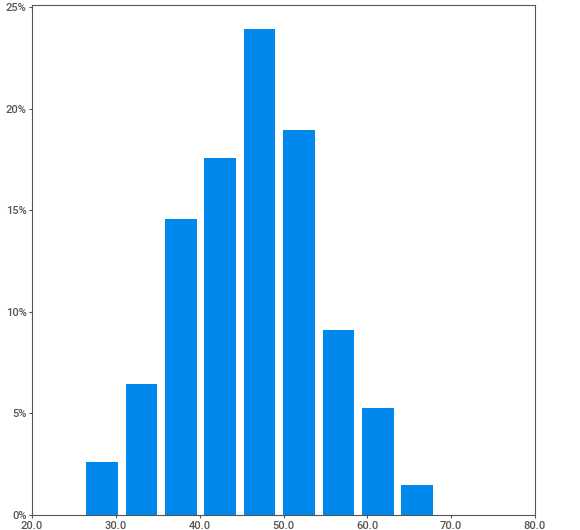
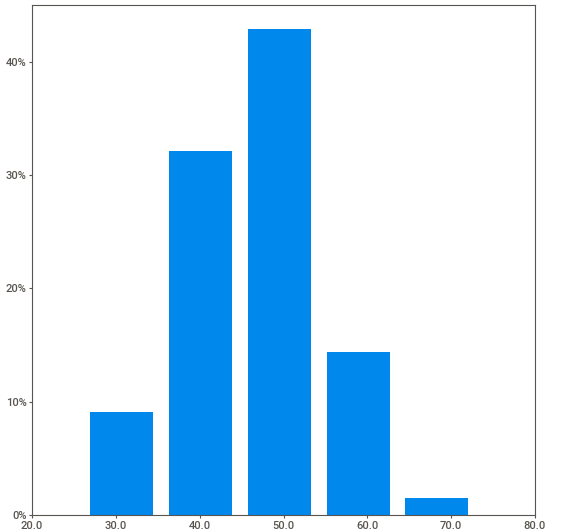
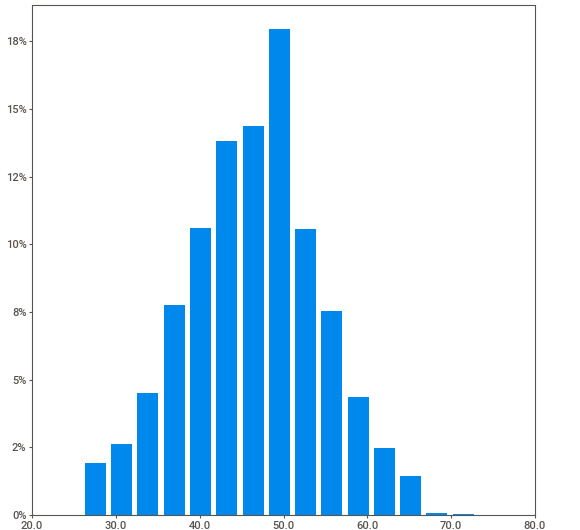
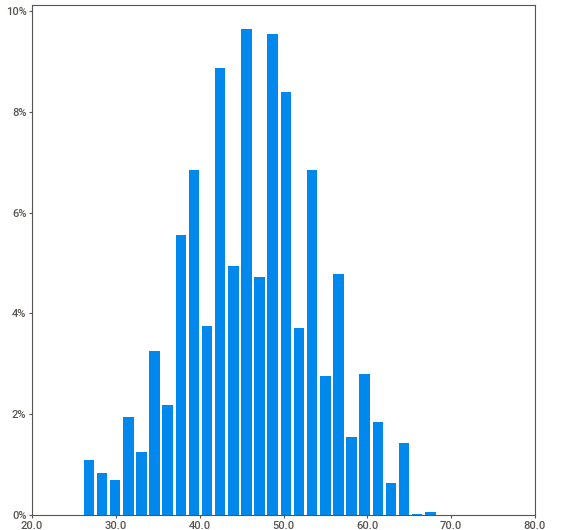
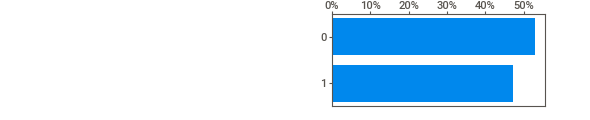
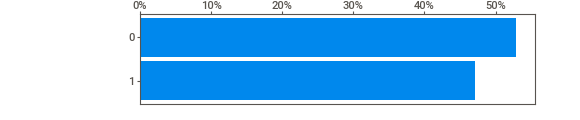
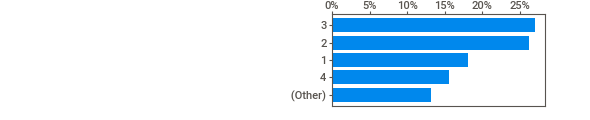
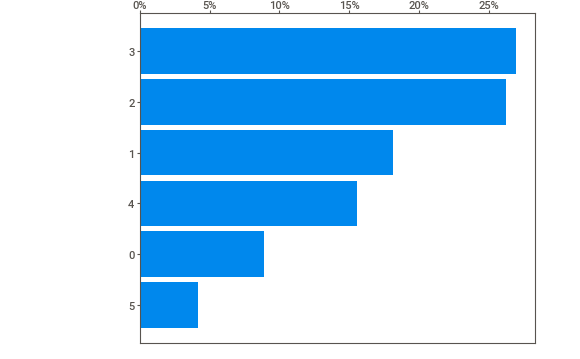
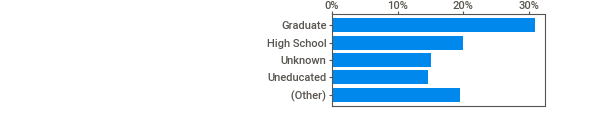
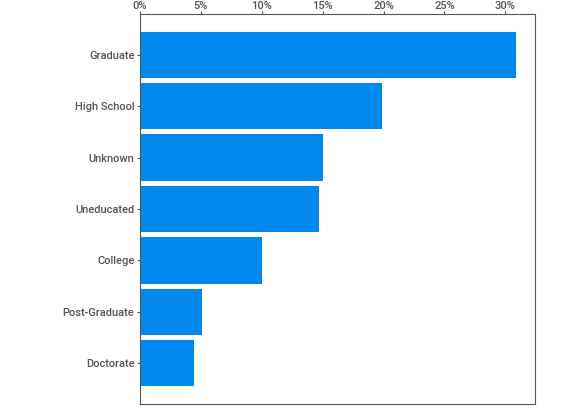
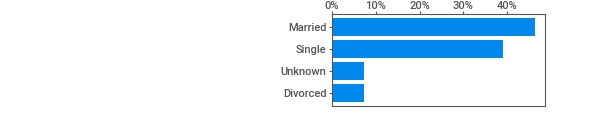
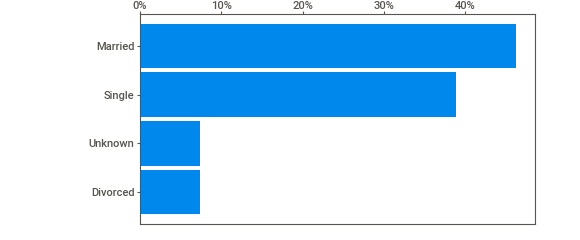
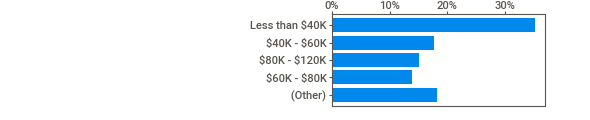
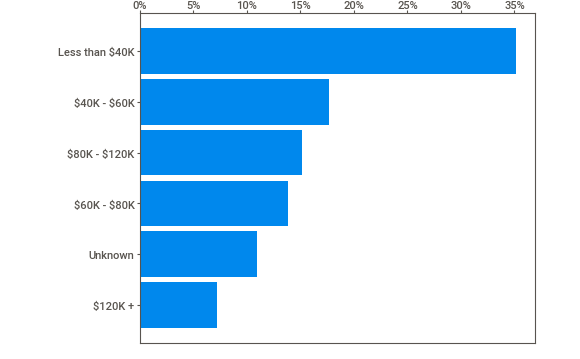
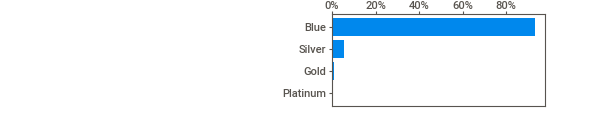
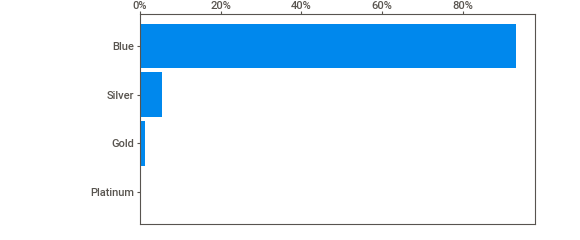
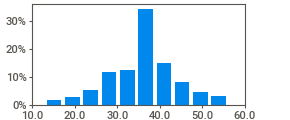
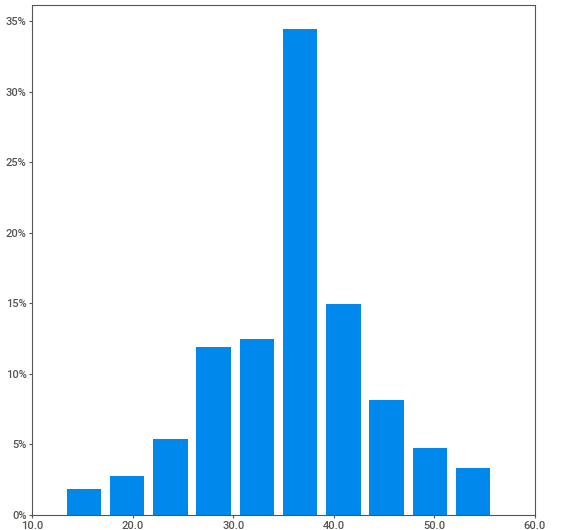
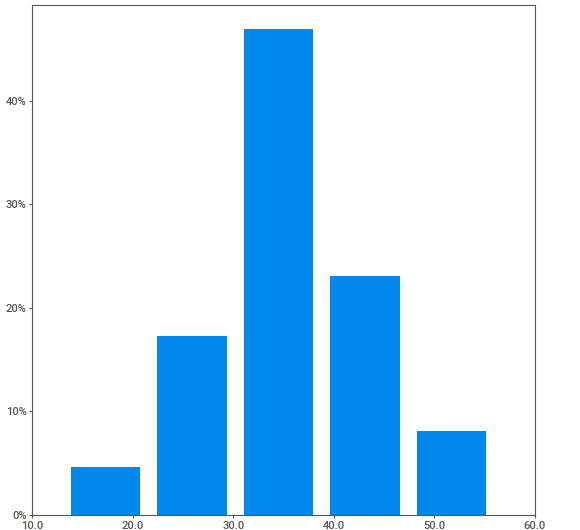
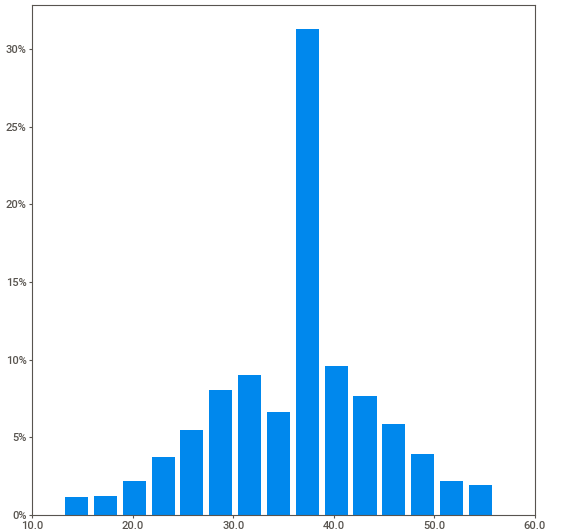
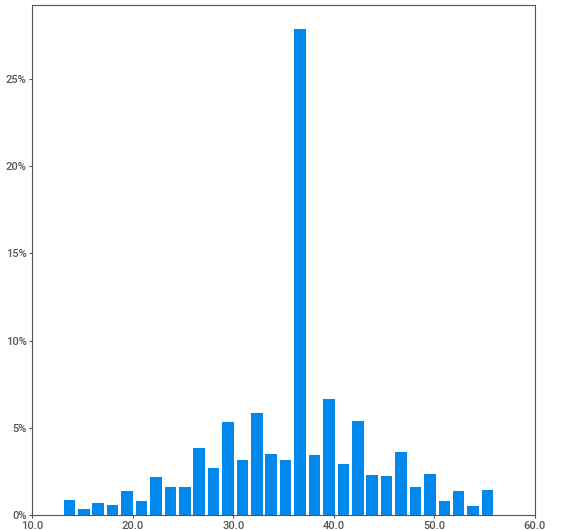
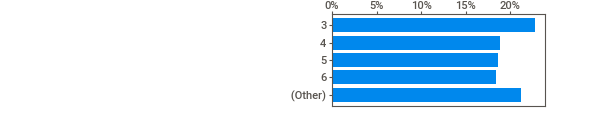
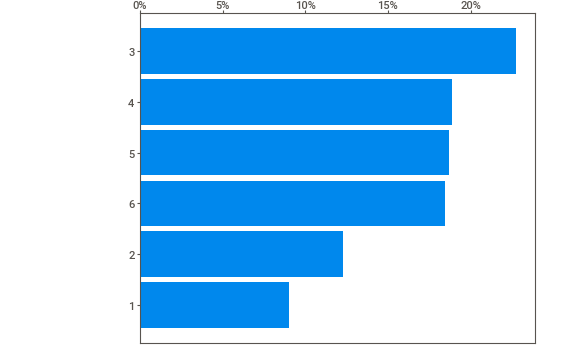
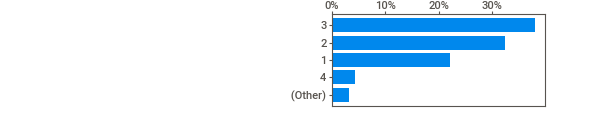
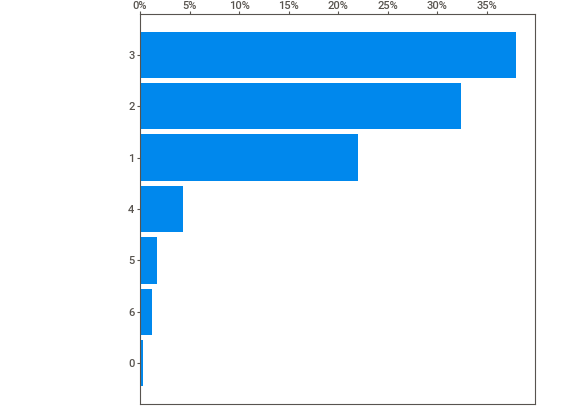
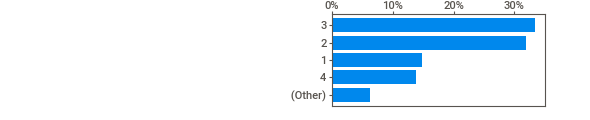
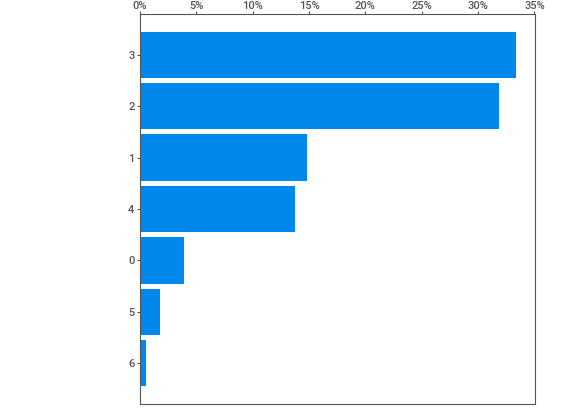
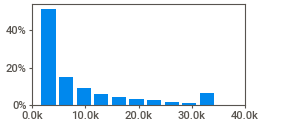
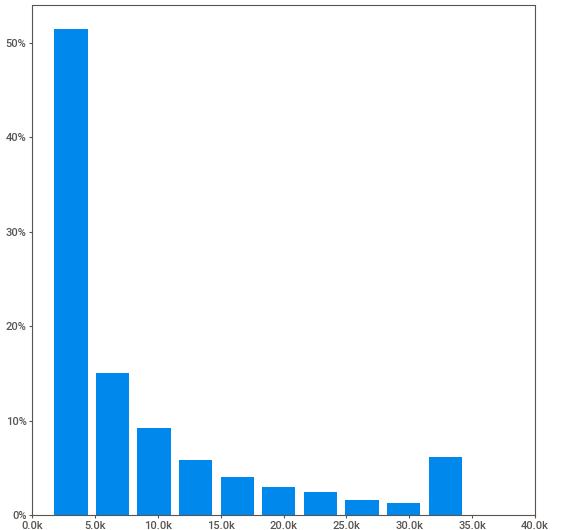
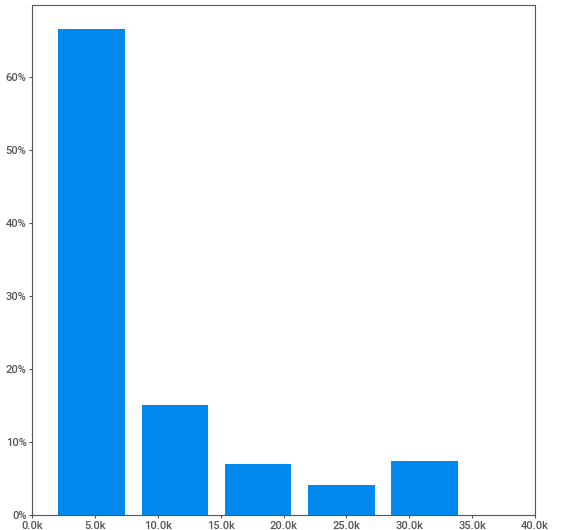
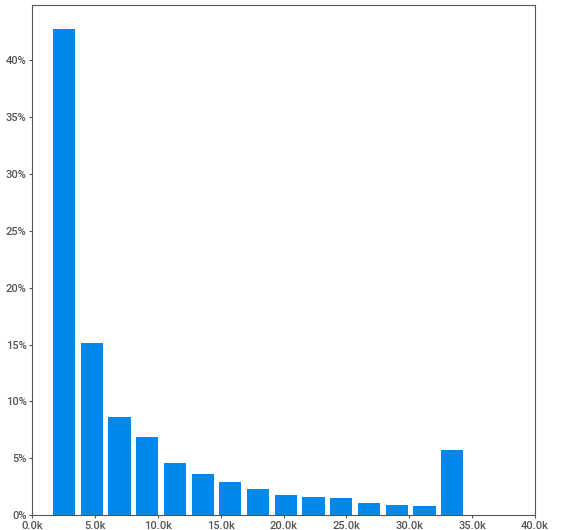
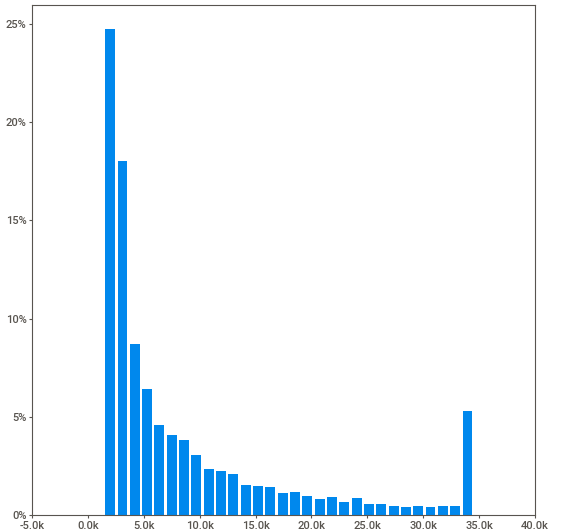
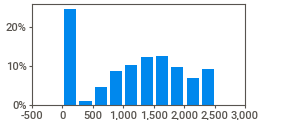
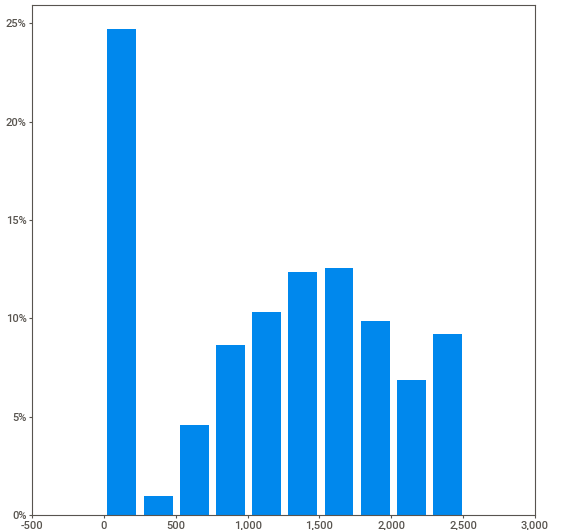
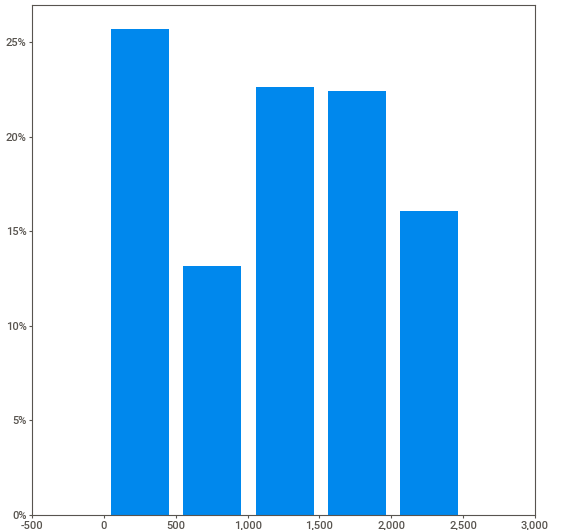
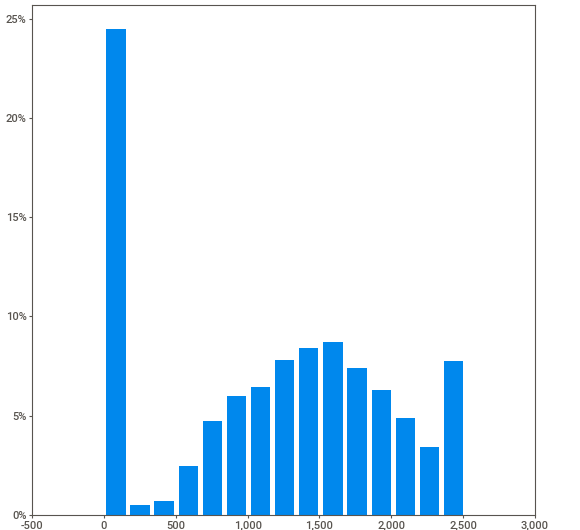
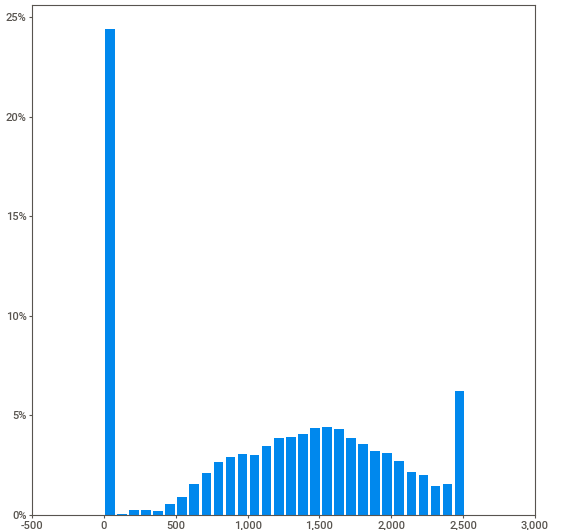
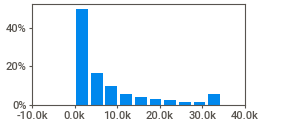
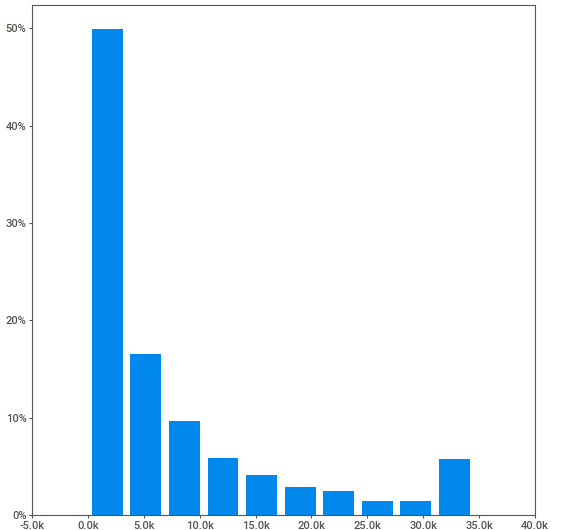
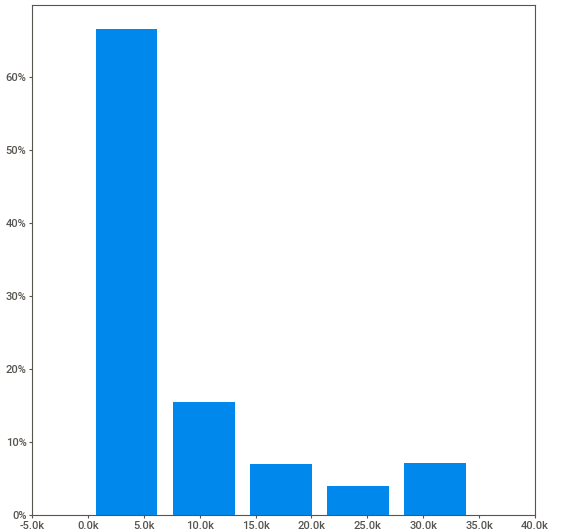
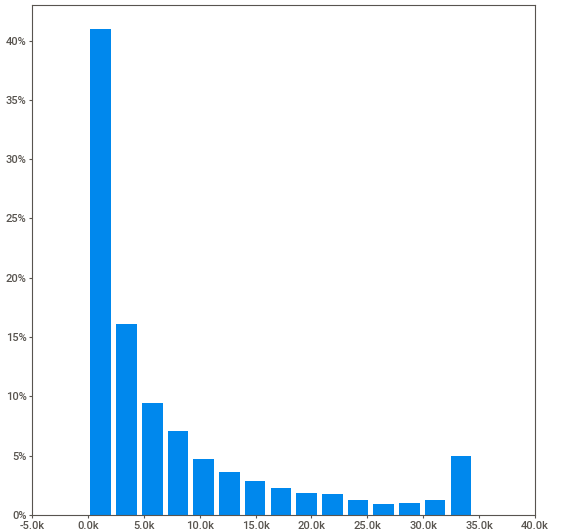
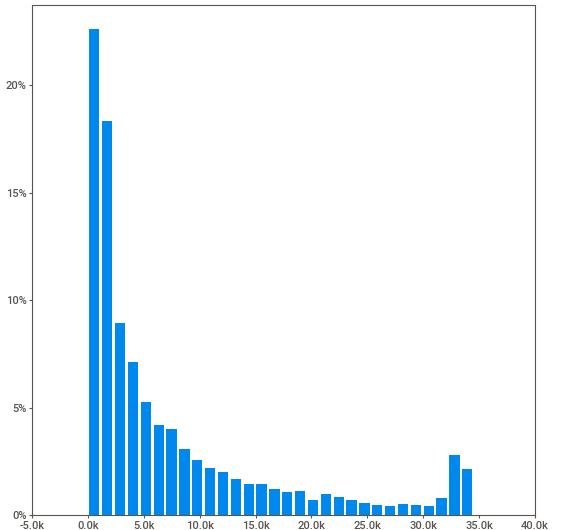
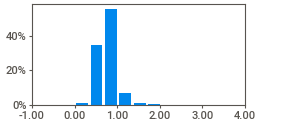
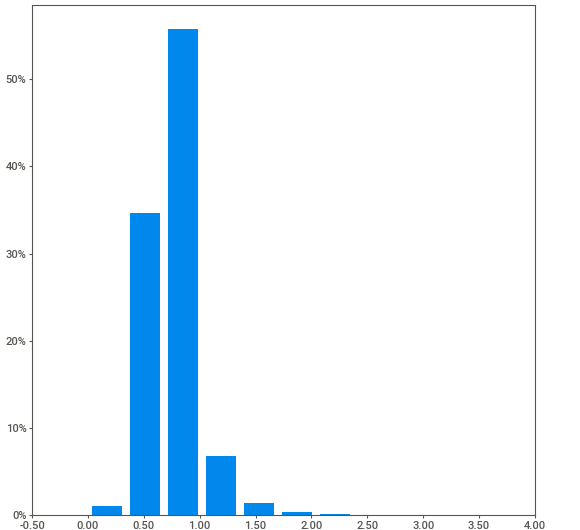
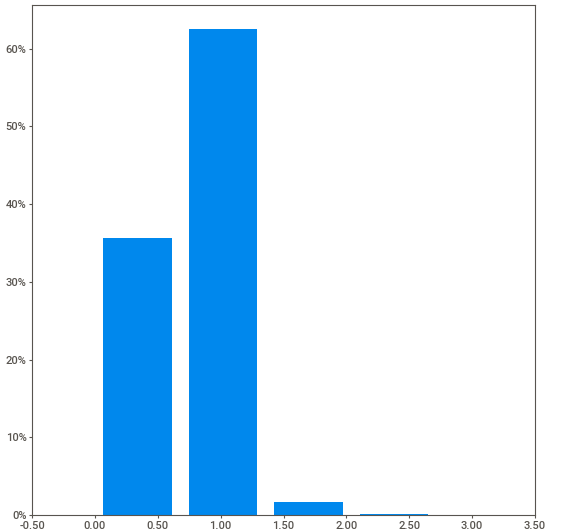
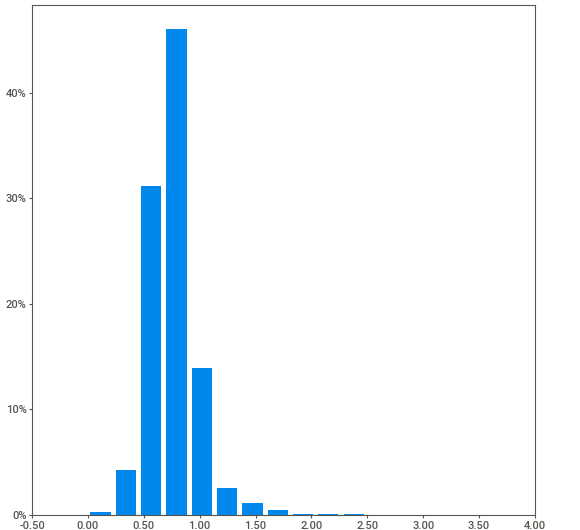
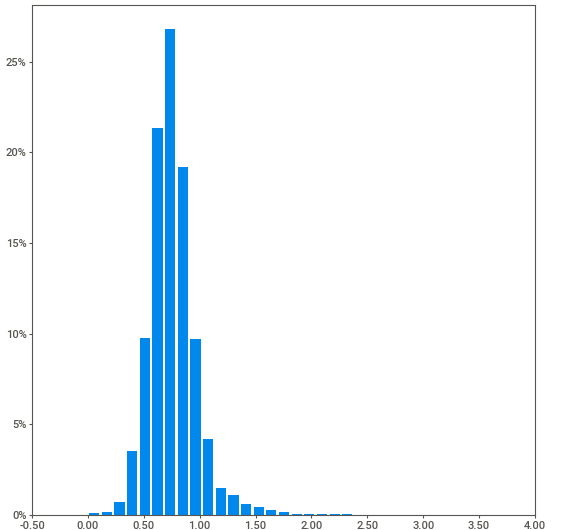
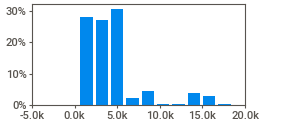
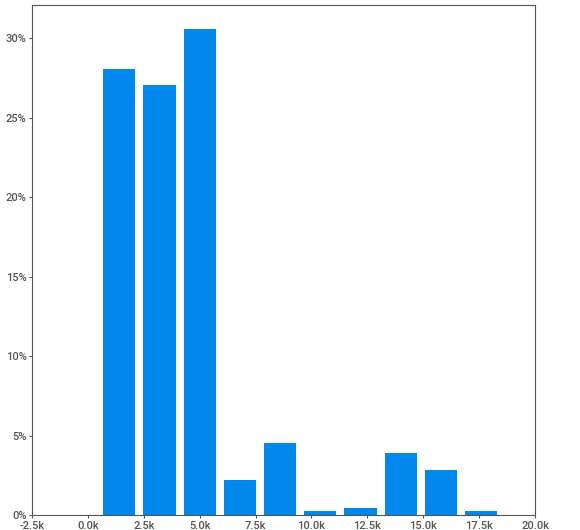
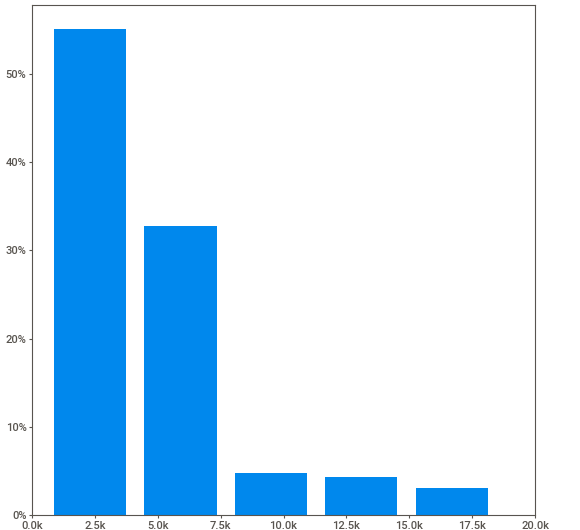
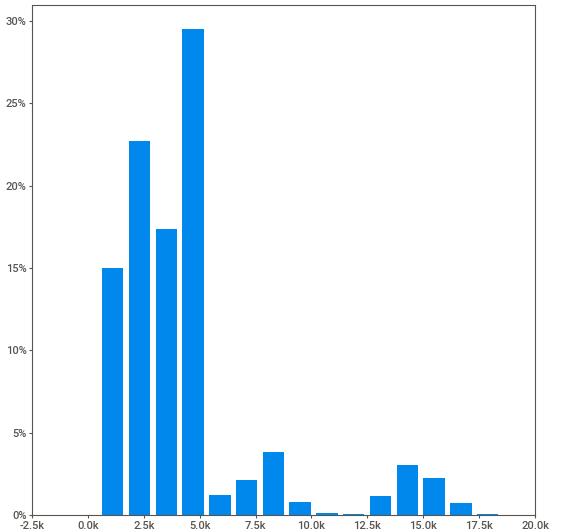
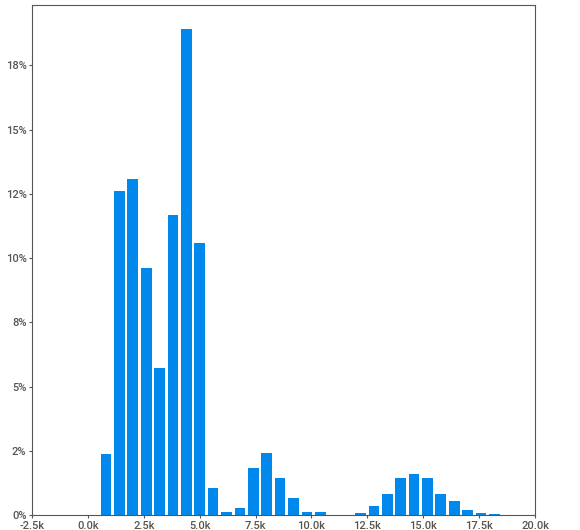
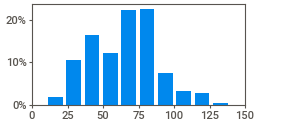
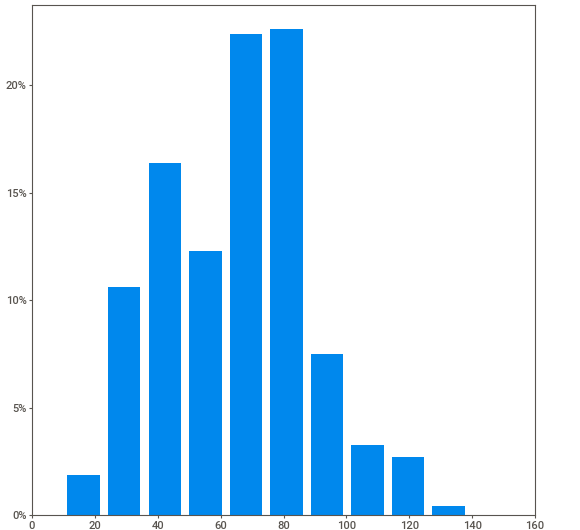
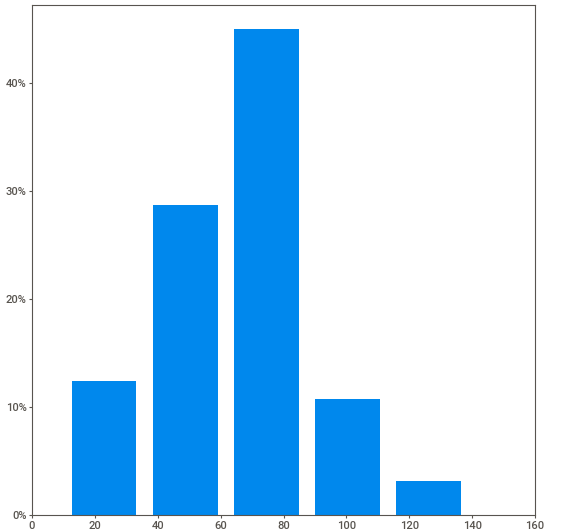
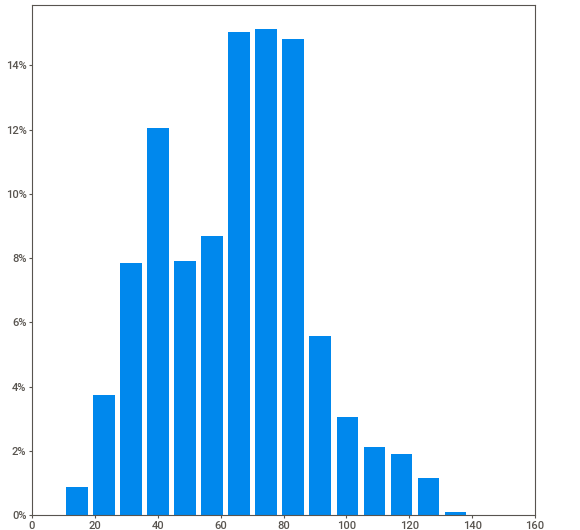
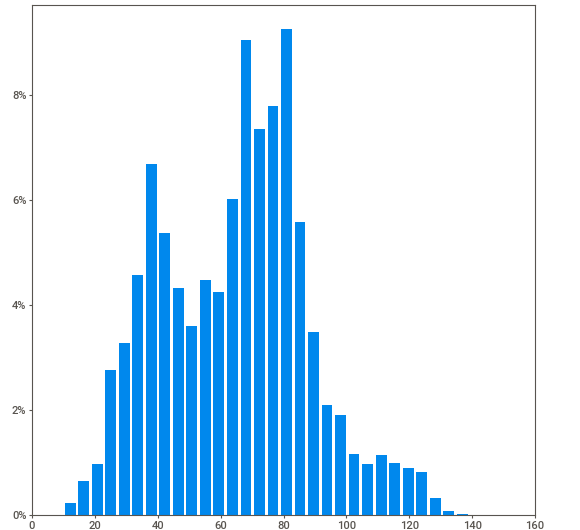
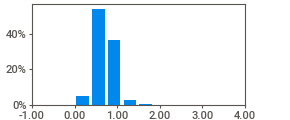
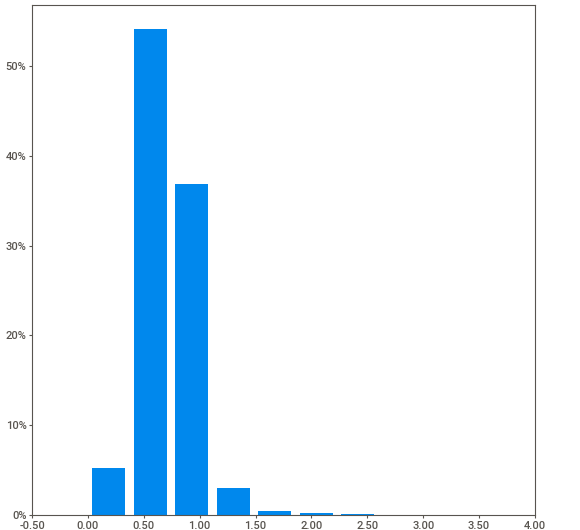
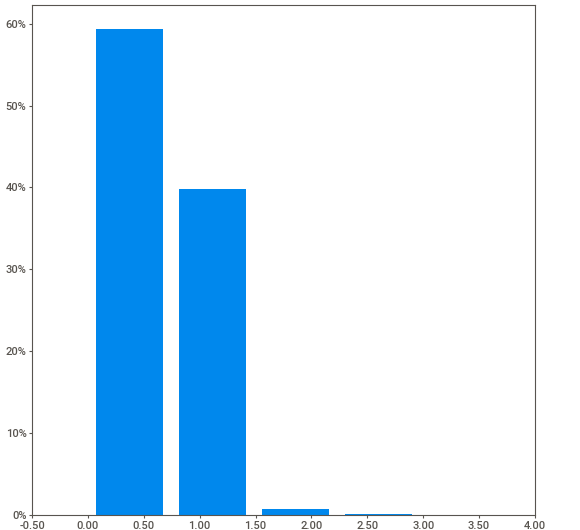
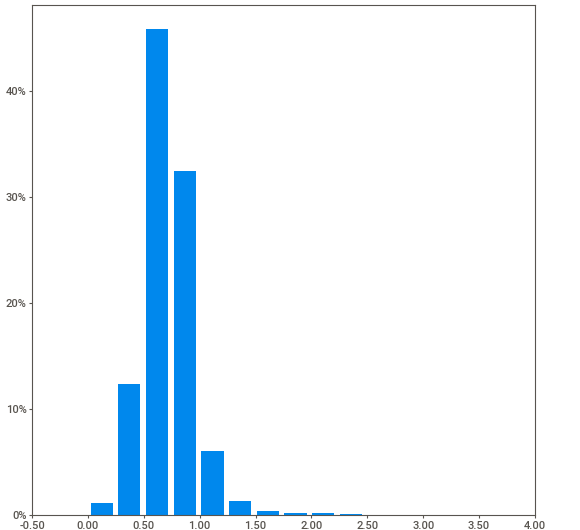
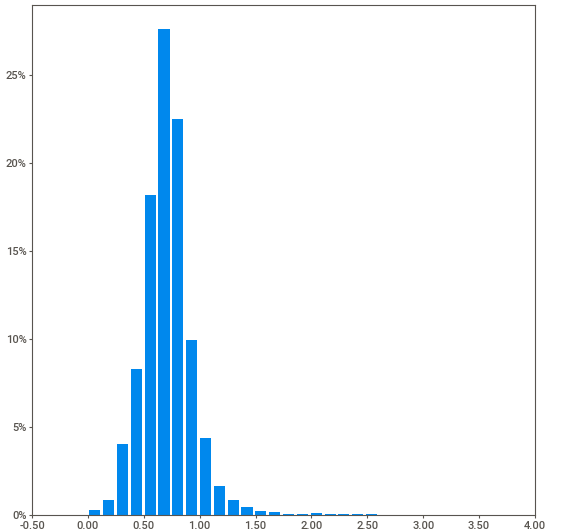
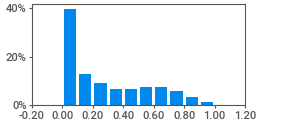
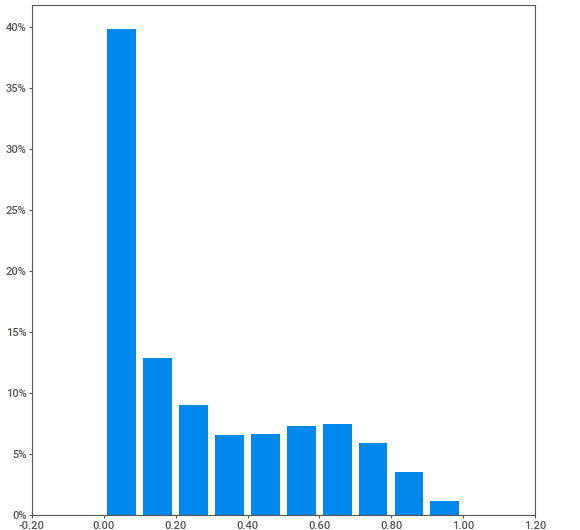
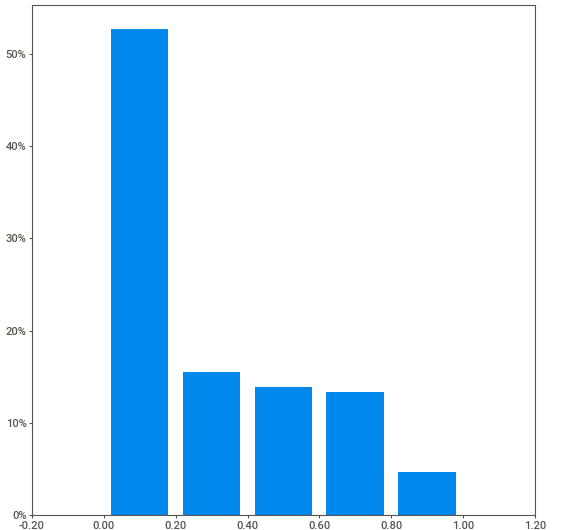
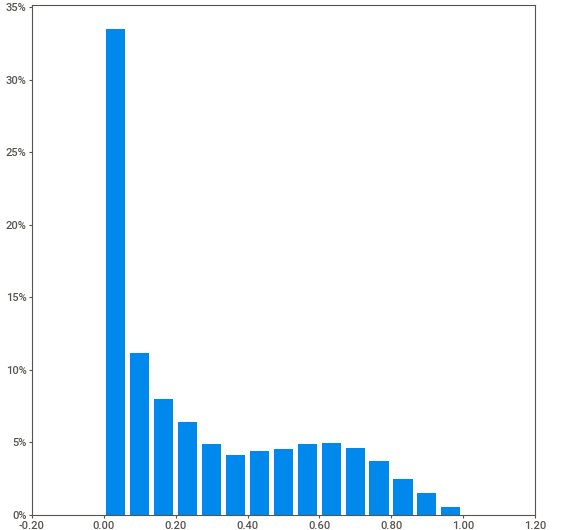
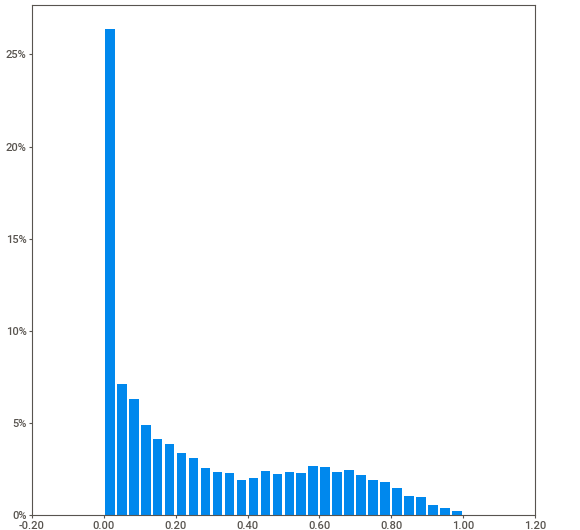
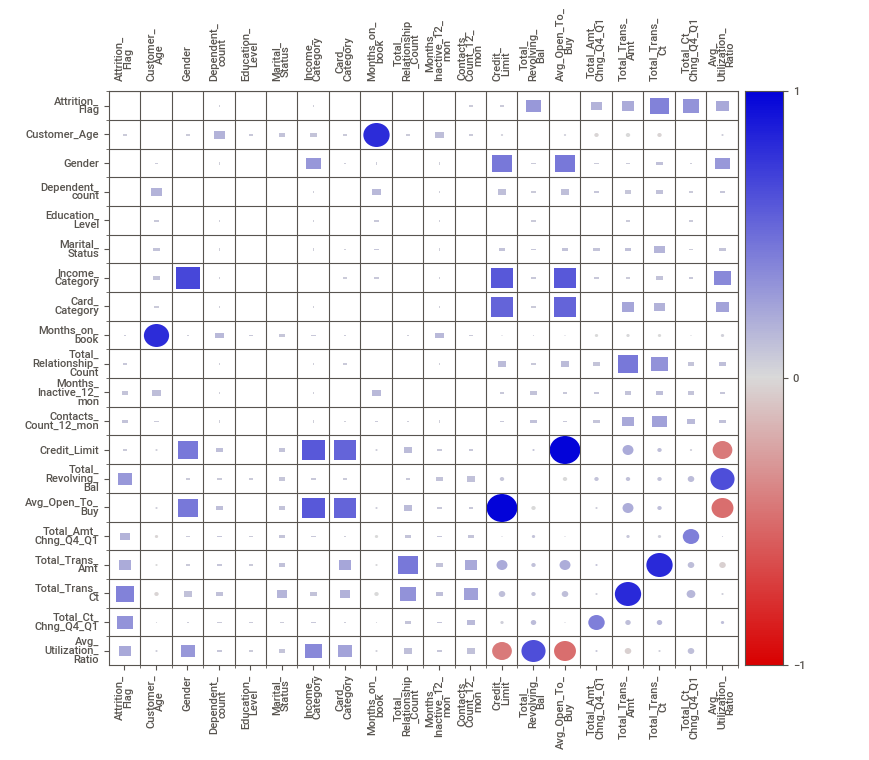
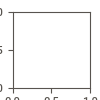

In [119]:
my_report = sv.analyze(df_master)

my_report.show_notebook()

 84% of customers in this data set are current customers, 16% have attrited. This skew may cause problems for predicting customers that may leave/close their account. May be necessary to normalize and pad this data out.

Attrition_Flag and Gender will both need to be label encoded, at a minmum. Education, income, marital status, and card category will need to be one hot encoded.

We will drop CLIENTNUM and 'Unnamed: 21', neither column is useful to the data. 



In [11]:
df_master.drop(['CLIENTNUM','Unnamed: 21'],axis=1,inplace=True)


In [12]:
print(df_master.nunique())

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


In [13]:
df_master['Attrition_Flag'].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

In [14]:
df_master['Income_Category'].value_counts(normalize=True)*100

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

It appears that we're missing income data on 10% of customers in this data set, something to keep in mind for data processing and tuning

In [15]:
df_master['Education_Level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [16]:


df_master['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True) #encoding features with only 2 distinct values


df_master['Gender'].replace(['F','M'],[0,1],inplace=True)

In [17]:
df_master.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0            45       1                3     High School   
1               0            49       0                5        Graduate   
2               0            51       1                3        Graduate   
3               0            40       0                4     High School   
4               0            40       1                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [18]:
def plot_distribution(churn):
    sns.set_style('ticks')
    s = sns.FacetGrid(df_master, hue='Attrition_Flag', aspect=3, palette={1 : 'Lightblue', 0 : 'gold'})
    s.map(sns.kdeplot, churn, shade = True, alpha = 0.8)
    s.add_legend()
    plt.show()

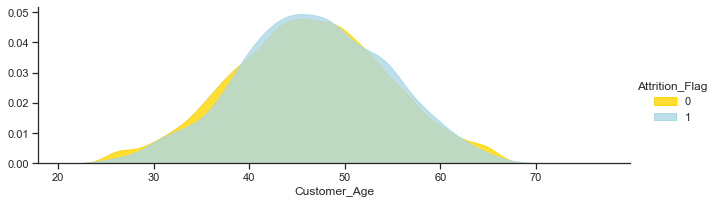

In [19]:
plot_distribution('Customer_Age')

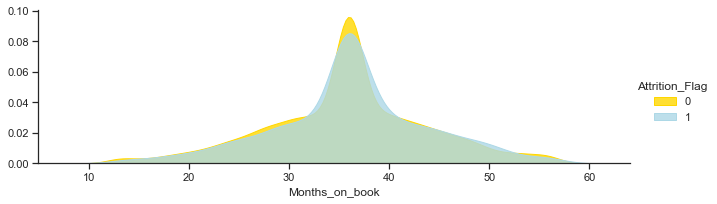

In [20]:
plot_distribution('Months_on_book')

Most cancelations appear to happen around the 3 year mark, but then again most customers are around the 3 year mark on average

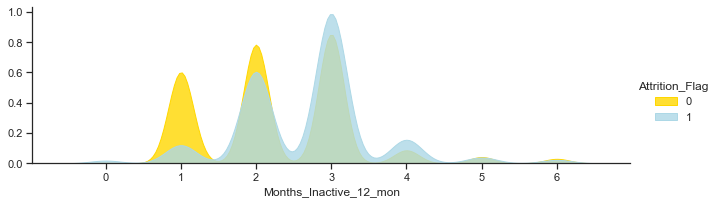

In [21]:
plot_distribution('Months_Inactive_12_mon')

Members that have inactive cards for 3 months seems to be significant factor giving information on attrition

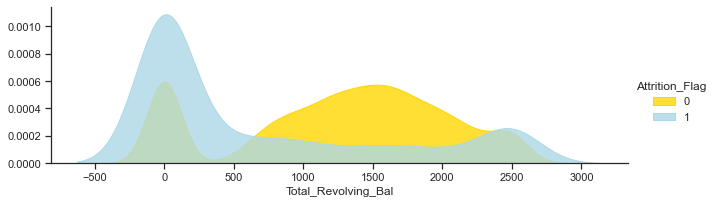

In [22]:
plot_distribution('Total_Revolving_Bal')

Small revolving balances are much more likely to churn

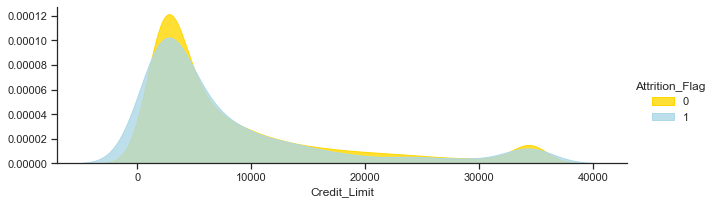

In [23]:
plot_distribution('Credit_Limit')

Attrition appears to decline as credit limits increase

In [24]:

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

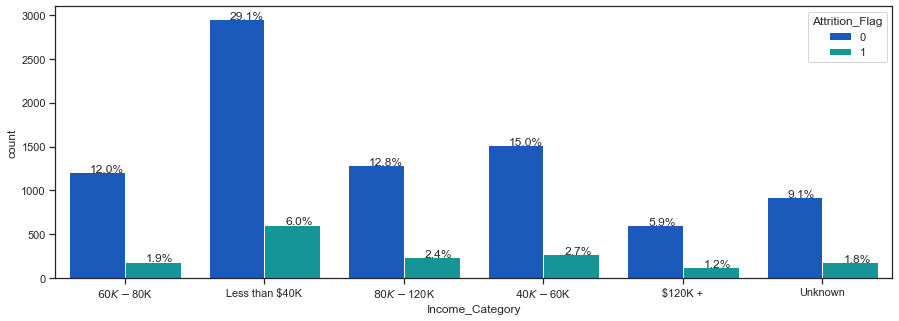

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df_master['Income_Category'],palette='winter',hue=df_master['Attrition_Flag'])
perc_on_bar(ax,df_master['Income_Category'])

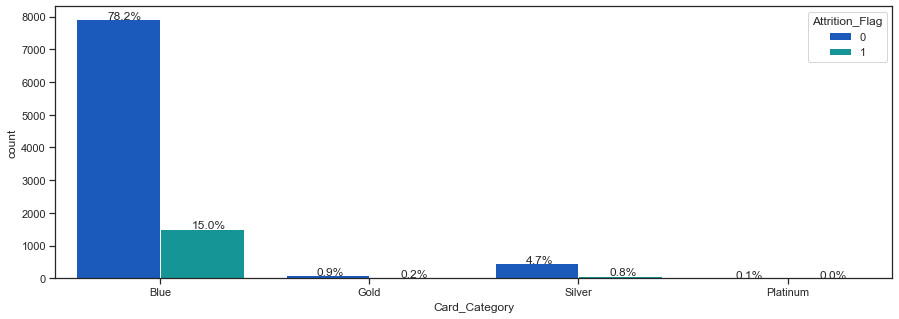

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df_master['Card_Category'],palette='winter',hue=df_master['Attrition_Flag'])
perc_on_bar(ax,df_master['Card_Category'])

The vast majority of customers are of card type 'Blue', I think this column can probably be dropped

array([[<AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>],
       [<AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>],
       [<AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>]],
      dtype=object)

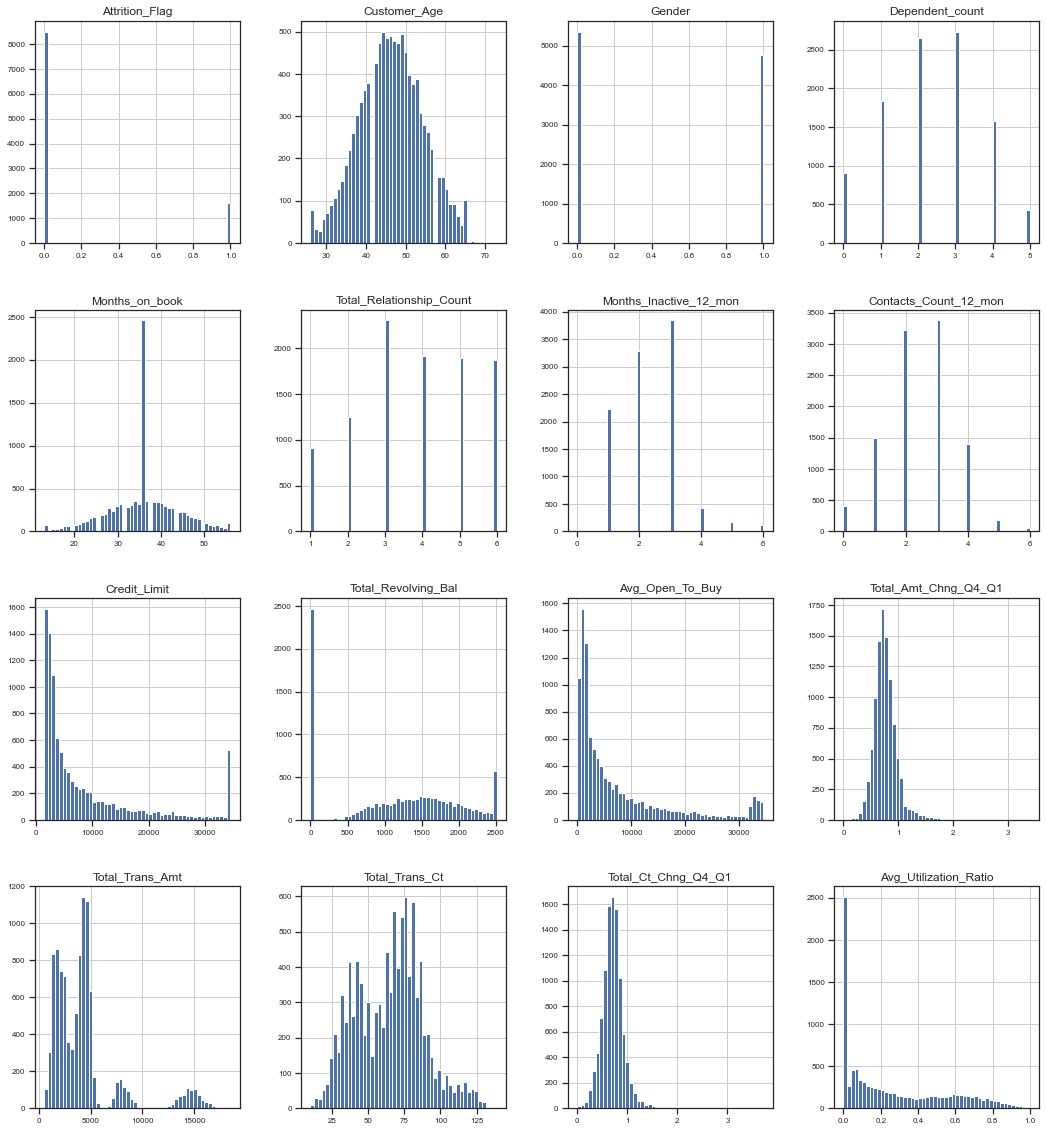

In [27]:
df_master.select_dtypes(include=['float64','int64']).hist(figsize=(18, 20), bins=50, xlabelsize=8, ylabelsize=8)

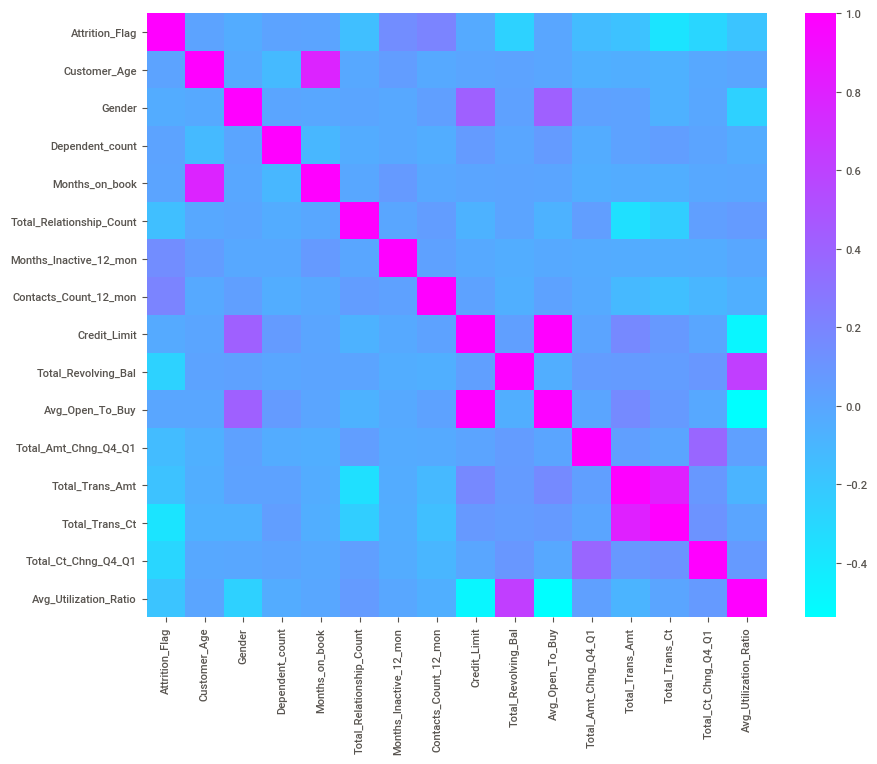

In [121]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_master.corr()
corr1 = df_master.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='cool')
plt.show()

Strong positive correlations with attrition & total_trans_amt, strong negative correlation with attrition and total_trans_ct, these correlations appear to be valuable and actually provide information, so we wont be dropping them.

In [30]:
sns.pairplot(df_master,hue='Attrition_Flag')
plt.show

This dataset does not appear to have many significant outliers or erroneous data, in general it seems to have a reasonable distribution of data and as such we wont try to treat any 'outliers'

In [28]:
df_master.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [29]:
data = pd.DataFrame(df_master)
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])], axis=1) #getting dummies on our categorical variables and then dropping any resulting columns titled 'unknown'
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])], axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])], axis=1)

data.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'Months_on_book'], inplace=True, errors = "ignore") #here we drop the original columns to prevent issues with dimensionality, we also dropped 'card category', as we decided that metric provides little overall information

In [30]:
data.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0               0            45       1                3   
1               0            49       0                5   
2               0            51       1                3   
3               0            40       0                4   
4               0            40       1                3   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  Post-Graduate  \
0       12691.0                  777          11914.0  ...              0   
1        8256.0                  864           7392.0  ...              0   
2        3418.0                    0           3418.0  ...              0   
3        3313.0                 2517            796.0  ...              0   
4        4716.0                    0           4716.0  ...              0   

   Uneducated  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
0           0        0            0            1             0   
1           0        0            0            0             0   
2           0        0            0            0             1   
3           0        0            0            0             0   
4           1        0            0            1             0   

   Less than $40K  Divorced  Married  Single  
0               0         0        1       0  
1               1         0        0       1  
2               0         0        1       0  
3               1         0        0       0  
4               0         0        1       0  

[5 rows x 29 columns]

In [31]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single'],
      dtype='object')

In [35]:
#my_report = sv.analyze(data)

#my_report.show_notebook()

##additional sweetviz report to check data after getting dummies

In [32]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Attrition_Flag',axis=1)
y = data.pop('Attrition_Flag')
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.30,random_state= 28)

rf = RandomForestClassifier(n_estimators = 100, random_state = 28)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=28)

BASE MODELS

In [33]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 57.36951819075713
RF: 76.46568338249755
GBM: 83.39233038348084
ADB: 81.08239921337265
XGB: 87.1189773844641
DTREE: 78.86529006882989


SCORING AND CONFUSION MATRIX FUNCTIONS

In [34]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [35]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

ADABOOST WITH GRIDSEARCH AND RANDOMIZEDSEARCH

In [36]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.8809950835791543
Wall time: 5min 59s


In [37]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9926636568848759
Accuracy on test set :  0.9723593287265548
Recall on training set :  0.9760213143872114
Recall on test set :  0.9021956087824351
Precision on training set :  0.9777580071174378
Precision on test set :  0.9281314168377823


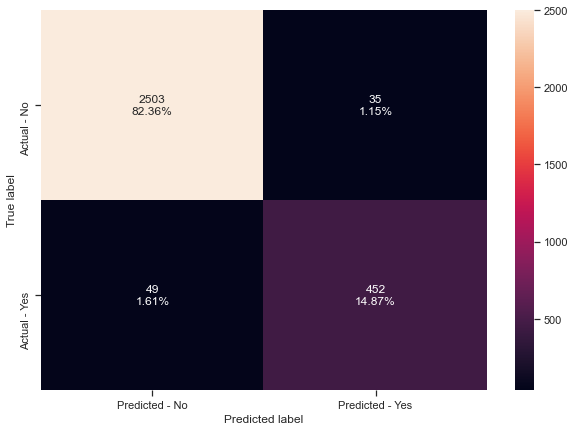

In [38]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

abc_tuned1 appears to have some slight over-fitting on test data, we'll see if we can clean that up in abc_tuned2

In [39]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 75),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 85, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8738879056047197:
Wall time: 1min 2s


In [40]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=85,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=85,
                                    random_state=1))])

Accuracy on training set :  0.9923814898419865
Accuracy on test set :  0.9700559394537677
Recall on training set :  0.9733570159857904
Recall on test set :  0.8922155688622755
Precision on training set :  0.9785714285714285
Precision on test set :  0.9235537190082644


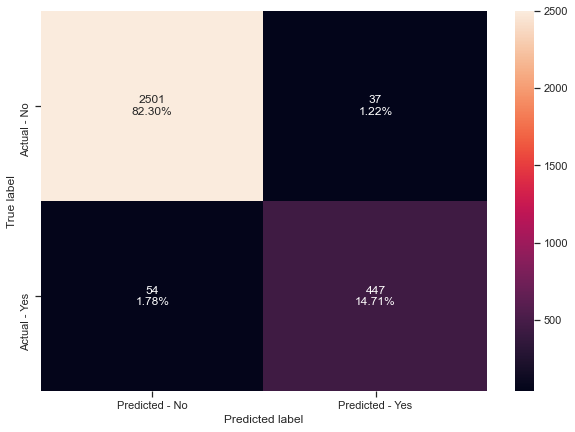

In [41]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

The randomized search cross validation routinely takes around 50% - 75% less time than grid search with similar parameters

XGBOOST WITH RANDOMIZED AND GRID CV

In [43]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9653647984267453:
Wall time: 1min 3s


In [45]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=100,
        scale_pos_weight=10,
        subsample=0.8,
        reg_lambda=10,
        learning_rate=0.2,
        max_depth=2,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=20, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9331264108352144
Accuracy on test set :  0.9302402105955907
Recall on training set :  0.9884547069271759
Recall on test set :  0.9800399201596807
Precision on training set :  0.7071156289707751
Precision on test set :  0.7085137085137085


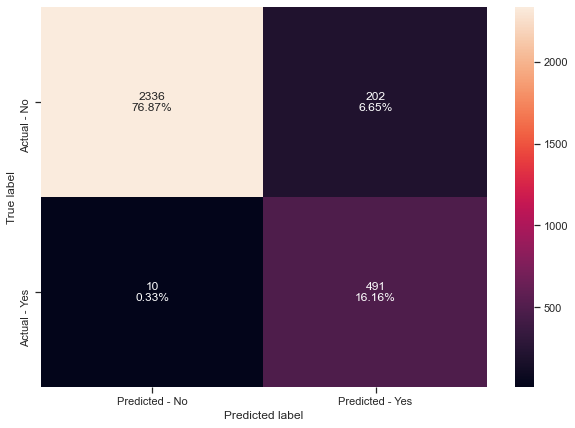

In [46]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

The XGBoost model is fit very well and has a very high recall rate at .98 on both training/test. This may be the best model to pick

In [47]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=20, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=20, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9331264108352144
Accuracy on test set :  0.9302402105955907
Recall on training set :  0.9884547069271759
Recall on test set :  0.9800399201596807
Precision on training set :  0.7071156289707751
Precision on test set :  0.7085137085137085


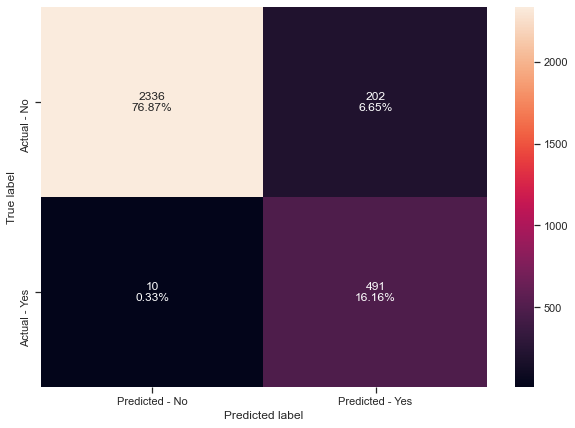

In [48]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

LOGISTIC REGRESSION

In [49]:


pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=4)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))


Test Accuracy: 0.882


In [50]:


rf_prediction = rf.predict(X_test)
print('F1 Score of Random Forest Model On Test Set {}'.format(f1(rf_prediction,y_test)))

F1 Score of Random Forest Model On Test Set 0.8720682302771855


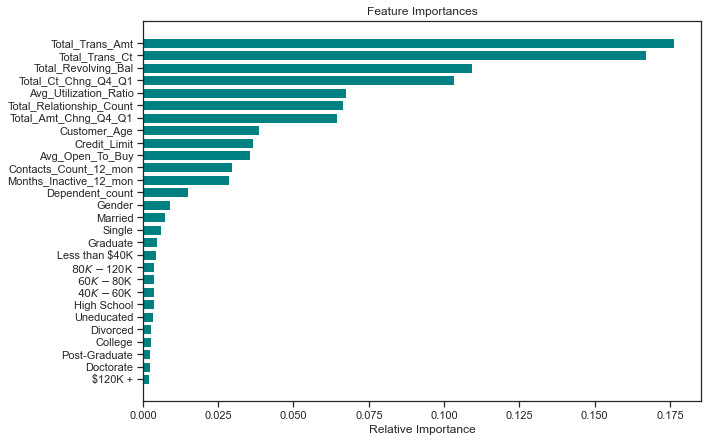

In [51]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Avg_Open_To_Buy appears to still have value as a feature, we wont remove it from the dataset

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 

param_grid = {'pca__n_components':[5,10,12],'svc__C': [0.1, 1, 5], 'svc__gamma': [0.1, 1], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc, param_grid = param_grid, cv = 3, n_jobs = -1) 



In [54]:
%time 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_))    
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

Wall time: 0 ns
 Best cross-validation accuracy: 0.89
 Best parameters:  {'pca__n_components': 10, 'svc__C': 5, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.89


In [55]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [5, 10, 12],
                         'svc__C': [0.1, 1, 5], 'svc__gamma': [0.1, 1],
                         'svc__kernel': ['rbf', 'poly']})>

In [56]:
get_metrics_score(grid)

Accuracy on training set :  0.9260722347629797
Accuracy on test set :  0.8881210924646266
Recall on training set :  0.6047957371225577
Recall on test set :  0.4590818363273453
Precision on training set :  0.8960526315789473
Precision on test set :  0.7692307692307693


[0.9260722347629797,
 0.8881210924646266,
 0.6047957371225577,
 0.4590818363273453,
 0.8960526315789473,
 0.7692307692307693]

The base logistic regression has awful recall and is quite overfit

In [62]:
##RandomSearchCV on logistic regression


pipe_svc = Pipeline([('scl',  StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 

param_grid = {'pca__n_components':[5,10,12],'svc__C': [0.1, 1, 5], 'svc__gamma': [0.1, 1], 'svc__kernel':['rbf','poly']} 

rand_lr = RandomizedSearchCV( pipe_svc, param_distributions=param_grid, cv = 3, n_jobs = -1) 

In [63]:
rand_lr.fit( X_train, y_train) 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scl', StandardScaler()),
                                             ('pca', PCA()), ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [5, 10, 12],
                                        'svc__C': [0.1, 1, 5],
                                        'svc__gamma': [0.1, 1],
                                        'svc__kernel': ['rbf', 'poly']})

In [64]:
get_metrics_score(rand_lr)

Accuracy on training set :  0.8919300225733634
Accuracy on test set :  0.8838433695294505
Recall on training set :  0.4058614564831261
Recall on test set :  0.3712574850299401
Precision on training set :  0.8249097472924187
Precision on test set :  0.8303571428571429


[0.8919300225733634,
 0.8838433695294505,
 0.4058614564831261,
 0.3712574850299401,
 0.8249097472924187,
 0.8303571428571429]

randomizedSearchCV still performed poorly on LR (I suppose it make sense that if gridsearch doesn't perform well, neither will randomized)

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint

In [65]:
clf = RandomForestClassifier(n_estimators=50)

In [67]:
param_dist = {"max_depth": [5, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [69]:
samples = 50  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [70]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 4}


In [71]:
randomCV.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=10,
                       min_samples_leaf=6, min_samples_split=4,
                       n_estimators=50)

In [72]:
randomCV.best_score_

0.9583802566657343

Accuracy on training set :  0.9942155756207675
Accuracy on test set :  0.9677525501809806
Recall on training set :  0.9769094138543517
Recall on test set :  0.8702594810379242
Precision on training set :  0.9865470852017937
Precision on test set :  0.929637526652452


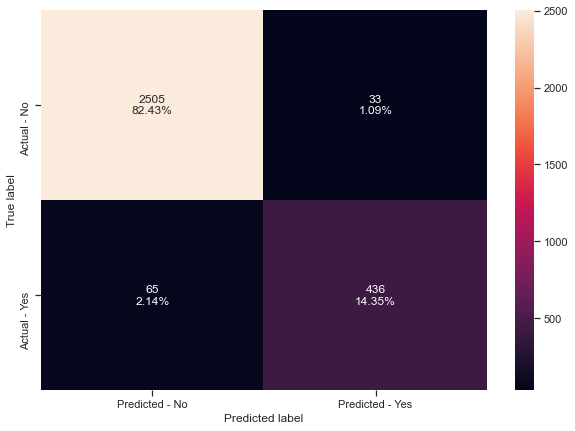

In [73]:
# Calculating different metrics
get_metrics_score(randomCV)

# Creating confusion matrix
make_confusion_matrix(randomCV, y_test)

RandomCV performed well, however recall isn't great. Not the best model we have made so far.

In [79]:
##using best parameters

param_dist = {"max_depth": [5, None],
              "max_features": sp_randint(8, 10, 12),
              "min_samples_split": sp_randint(4, 8),
              "min_samples_leaf": sp_randint(2, 6),
              "bootstrap": [False],
              "criterion": ["entropy"]}

samples = 50  # number of random samples 
randomCV_2 = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [80]:
randomCV_2.fit(X_train, y_train)

 
print(randomCV_2.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 4}


Accuracy on training set :  0.9991534988713319
Accuracy on test set :  0.9647910496873972
Recall on training set :  0.9991119005328597
Recall on test set :  0.8842315369261478
Precision on training set :  0.995575221238938
Precision on test set :  0.9004065040650406


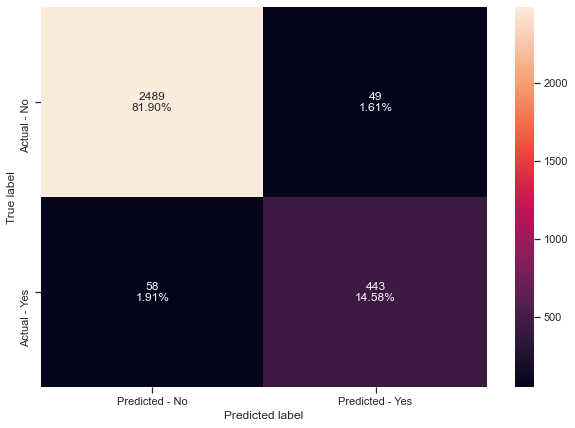

In [81]:
# Calculating different metrics
get_metrics_score(randomCV_2)

# Creating confusion matrix
make_confusion_matrix(randomCV_2, y_test)

RandomCV_2 showed significant (relative with other models) improvement with tuned parameters, this may be one of our best models

MODEL COMPARISONS

In [91]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [92]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)


Model  Train_Accuracy  Test_Accuracy  \
2              XGBoost with GridSearchCV        0.933126       0.930240   
3        XGBoost with RandomizedSearchCV        0.933126       0.930240   
0        Decision Tree with GridSearchCV        0.992664       0.972359   
1  Decision Tree with RandomizedSearchCV        0.992381       0.970056   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
2      0.988455     0.980040         0.707116        0.708514  
3      0.988455     0.980040         0.707116        0.708514  
0      0.976021     0.902196         0.977758        0.928131  
1      0.973357     0.892216         0.978571        0.923554

To be quite honest, I dont know why this is failing

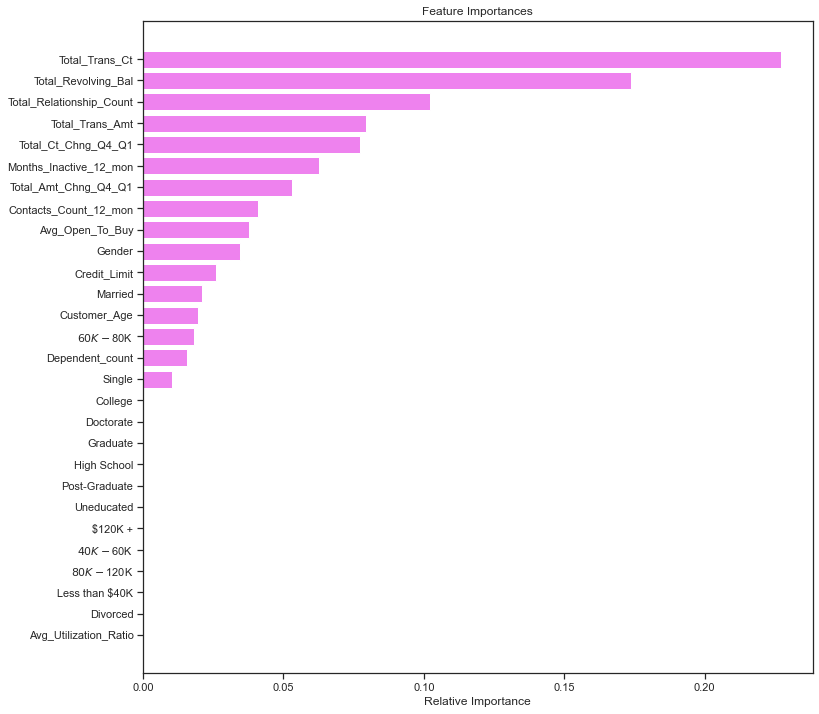

In [88]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

As expected, total transactions (frequency of use) and revolving balance play the biggest role in indicating if a user will attrite

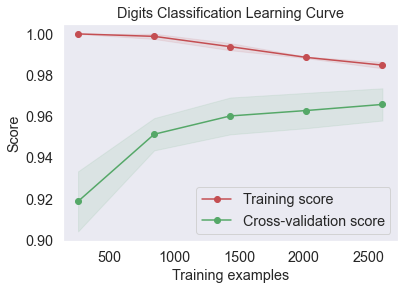

In [92]:
skplt.estimators.plot_learning_curve(GradientBoostingClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

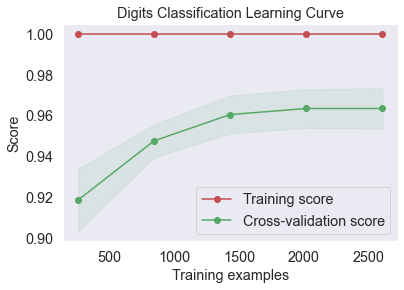

In [93]:
skplt.estimators.plot_learning_curve(XGBClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

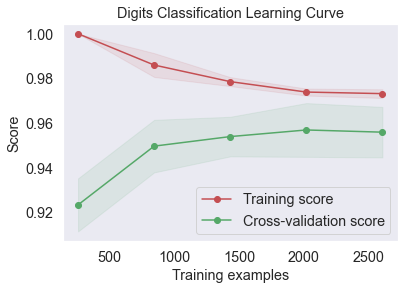

In [94]:
skplt.estimators.plot_learning_curve(AdaBoostClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

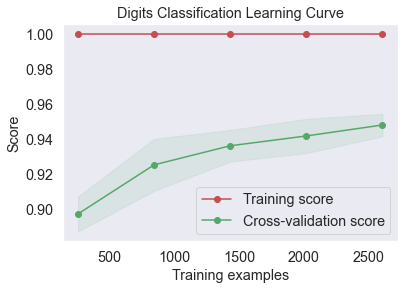

In [95]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

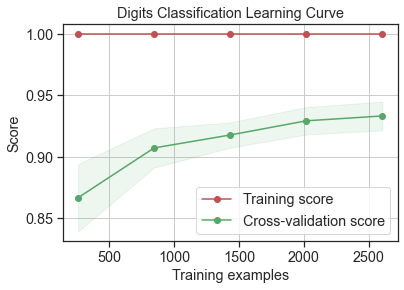

In [90]:
skplt.estimators.plot_learning_curve(DecisionTreeClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

Business Recommendations:

Customers that have a high frequency of use, high revolving balance, use other similar products, or have high single transaction purchase are less likely to cancel their card. In order to reduce churn, it is necessary to incentive other users/customers to act in this same way. Active users are much less likely to cancel a card/account, the crux lies in getting inactive users to become active users. The best way to achieve this would be to incentivize use of the card, and ensure existing customers have a solid, foundational brand-awareness (i.e. they do not forget about your product or service). Reducing barriers to entry/barriers to use would also be effective in helping to reduce churn. 

On the flip-side, it may be worth inducing high-churn in-order to find the 'whale' customers that account for the majority of revenue momentum. 

Customers that are already heavily engaged with the product may not require any additional incentive/justification/massaging, this would require further testing but is hypothetically viable. An approach of min-maxing advertising & brand-awareness budget to target apathetic customers and new customer could be the most efficient business approach. Set a 'desired usage' threshold and compare that to the customers bases' 'actual usage' and then target the customers that fall bellow this threshold; these are your 'apathetic customers'. 



**(In retrospect, I think this may be the exact reason why mileage & rewards programs exist as well as specialty cards like the fabled 'MasterCard Black Card'. This upsets me in a deep way because it is obviously exploitative, however it would be completely opaque to the average customer. They would be operating under the assumption that '[XYZ Company] offer incentives to be competitive in their market'.)**